In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [1]:
image_path = '/home/saikiran/HBRS/RD/actual_data/images/'

In [2]:
red_detections = '/home/saikiran/HBRS/RD/actual_data/results/comp4_det_test_red.txt'
green_detections = '/home/saikiran/HBRS/RD/actual_data/results/comp4_det_test_green.txt'

In [1]:
with open(red_detections) as red_file:
    for line in red_file:
        fname, prob, bbox = line.split()[0], line.split()[1], line.split()[2:]
        if prob > 0.25:
            xmin = int(round(float(bbox[0])))
            ymin = int(round(float(bbox[1])))
            xmax = int(round(float(bbox[2])))
            ymax = int(round(float(bbox[3])))
            coords = (xmin, ymin), xmax-xmin, ymax-ymin
            
            plt.imshow(image_path+fname+'.jpg')
            

NameError: name 'red_detections' is not defined

In [12]:
line = '0b560e12ad75741267575d4d53db7a2b 0.841962 234.009476 92.850502 241.550430 112.464958'

In [24]:
fname, prob, bbox = line.split()[0], line.split()[1], (line.split()[2:])

TypeError: int() argument must be a string or a number, not 'list'

In [14]:
print bbox 

['234.009476', '92.850502', '241.550430', '112.464958']


In [51]:
xmin = int(round(float(bbox[0])))
ymin = int(round(float(bbox[1])))
xmax = int(round(float(bbox[2])))
ymax = int(round(float(bbox[3])))

In [69]:
coords = (xmin, ymin), xmax-xmin, ymax-ymin

In [25]:
coords = (int(bbox[0]), int(bbox[1])), int(bbox[2])-int(bbox[0])+1, int(bbox[3])-int(bbox[1])+1

ValueError: invalid literal for int() with base 10: '234.009476'

In [26]:
im.shape

(256, 455, 3)

In [91]:
score = round(float(prob),2)

In [93]:
disp_text = 'red: '+'{0:.2f}'.format(float(prob))

In [94]:
print disp_text

red: 0.84


In [3]:
import cv2

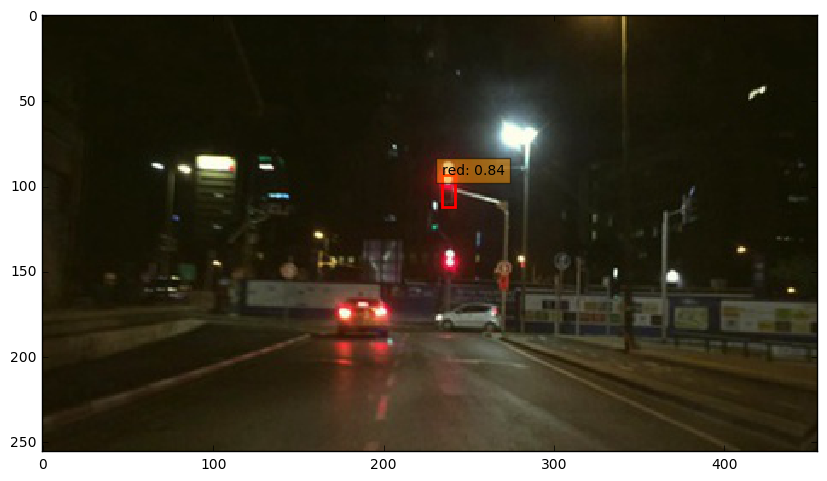

In [99]:
im = plt.imread(image_path+fname+'.jpg')
plt.imshow(im)
currentAxis = plt.gca()
currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=colors[0], linewidth=2))
currentAxis.text(xmin, ymin, disp_text, bbox={'facecolor':colors[2], 'alpha':0.5})

In [30]:
coords

((106474, 23770), 3432, 5022)

In [65]:
im = cv2.imread(image_path+fname+'.jpg')

In [66]:
cv2.rectangle(im, (xmin,ymin), (xmax, ymax), (255,0,0), 1)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(im, 'red', (xmin,ymin), font, 0.5,(0,0,255),1)

In [56]:
xmin

234

In [67]:
cv2.imshow('im',im )
cv2.waitKey(0)

10

In [ ]:
cv2.destroyAllWindows()
for i in range(5):
    cv2.waitKey(3)

In [72]:
import numpy as np

In [73]:
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

In [74]:
colors

[[1.0, 0.0, 0.0, 1.0],
 [1.0, 0.2779414544120426, 0.0, 1.0],
 [1.0, 0.5790446966917554, 0.0, 1.0],
 [1.0, 0.8801479389714684, 0.0, 1.0],
 [0.8187488187488188, 1.0, 0.0, 1.0],
 [0.5176455764691059, 1.0, 0.0, 1.0],
 [0.23970412205706326, 1.0, 0.0, 1.0],
 [0.0003669599257835228, 1.0, 0.061766080148432954, 1.0],
 [0.0, 1.0, 0.3625004724974957, 1.0],
 [0.0, 1.0, 0.6636018178368361, 1.0],
 [0.0, 1.0, 0.9647031631761764, 1.0],
 [0.0, 0.7573556047820753, 1.0, 1.0],
 [0.0, 0.4562523625023627, 1.0, 1.0],
 [0.0, 0.15514912022264993, 1.0, 1.0],
 [0.14595412205706287, 0.0, 1.0, 1.0],
 [0.44705736433677606, 0.0, 1.0, 1.0],
 [0.724998818748819, 0.0, 1.0, 1.0],
 [0.9878673536761773, 0.0, 0.9617652926476454, 1.0],
 [1.0, 0.0, 0.6727946966917553, 1.0],
 [1.0, 0.0, 0.37169145441204254, 1.0],
 [1.0, 0.0, 0.09375, 1.0]]

In [9]:
# Chunk of code to get the list of files where there are both classes in validation set
common_list = []
with open(green_detections, 'r') as green:
        for each_line in green:
            g_fname = each_line.split()[0]
            with open(red_detections, 'r') as red:
                for r_each_line in red:
                    r_fname = r_each_line.split()[0]
                    if g_fname.strip() == r_fname.strip() and g_fname not in common_list:
                        common_list.append(g_fname)

#### A chunk of code to copy test labels to a folder called test_labels

In [25]:
from shutil import copyfile

In [26]:
annotations_path = '/home/saikiran/HBRS/RD/actual_data/labels/'
test_file = '/home/saikiran/HBRS/RD/actual_data/results/test.txt'
dst_path = '/home/saikiran/HBRS/RD/actual_data/test_labels/'

In [28]:
with open(test_file, 'r') as test:
    for line in test:
        f_name = line.split('/')[-1].strip().split('.')[0]
        copyfile(annotations_path+f_name+'.xml', dst_path+f_name+'.xml')

#### The filenames in the test file must contain only image file names one per line, hence the below chunk of code does it.

In [36]:
new_test_file = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
with open(test_file, 'r') as test:
    with open(new_test_file, 'w') as new_test:
        for line in test:
            f_name = line.split('/')[-1].strip().split('.')[0]
            new_test.write(f_name+'\n')
    new_test.close()

## Code for ROC curves and class wise map vlaues

In [2]:
import xml.etree.ElementTree as ET
import os
import cPickle
import numpy as np



def parse_rec(filename):
    """ Parse a PASCAL VOC xml file """
    tree = ET.parse(filename)
    objects = []
    for obj in tree.findall('object'):
        obj_struct = {}
        obj_struct['name'] = obj.find('name').text
        obj_struct['pose'] = obj.find('pose').text
        obj_struct['truncated'] = int(obj.find('truncated').text)
        obj_struct['difficult'] = int(obj.find('difficult').text)
        bbox = obj.find('bndbox')
        obj_struct['bbox'] = [int(bbox.find('xmin').text),
                              int(bbox.find('ymin').text),
                              int(bbox.find('xmax').text),
                              int(bbox.find('ymax').text)]
        objects.append(obj_struct)

    return objects

def voc_ap(rec, prec, use_07_metric=False):
    """ ap = voc_ap(rec, prec, [use_07_metric])
    Compute VOC AP given precision and recall.
    If use_07_metric is true, uses the
    VOC 07 11 point method (default:False).
    """
    if use_07_metric:
        # 11 point metric
        ap = 0.
        for t in np.arange(0., 1.1, 0.1):
            if np.sum(rec >= t) == 0:
                p = 0
            else:
                p = np.max(prec[rec >= t])
            ap = ap + p / 11.
    else:
        # correct AP calculation
        # first append sentinel values at the end
        mrec = np.concatenate(([0.], rec, [1.]))
        mpre = np.concatenate(([0.], prec, [0.]))

        # compute the precision envelope
        for i in range(mpre.size - 1, 0, -1):
            mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

        # to calculate area under PR curve, look for points
        # where X axis (recall) changes value
        i = np.where(mrec[1:] != mrec[:-1])[0]

        # and sum (\Delta recall) * prec
        ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap

def voc_eval(detpath,
             annopath,
             imagesetfile,
             classname,
             cachedir,
             ovthresh=0.5,
             use_07_metric=False):
    """rec, prec, ap = voc_eval(detpath,
                                annopath,
                                imagesetfile,
                                classname,
                                [ovthresh],
                                [use_07_metric])

    Top level function that does the PASCAL VOC evaluation.

    detpath: Path to detections
        detpath.format(classname) should produce the detection results file.
    annopath: Path to annotations
        annopath.format(imagename) should be the xml annotations file.
    imagesetfile: Text file containing the list of images, one image per line.
    classname: Category name (duh)
    cachedir: Directory for caching the annotations
    [ovthresh]: Overlap threshold (default = 0.5)
    [use_07_metric]: Whether to use VOC07's 11 point AP computation
        (default False)
    """
    # assumes detections are in detpath.format(classname)
    # assumes annotations are in annopath.format(imagename)
    # assumes imagesetfile is a text file with each line an image name
    # cachedir caches the annotations in a pickle file

    # first load gt
    if not os.path.isdir(cachedir):
        os.mkdir(cachedir)
    cachefile = os.path.join(cachedir, 'annots.pkl')
    # read list of images
    with open(imagesetfile, 'r') as f:
        lines = f.readlines()
    imagenames = [x.strip() for x in lines]

    if not os.path.isfile(cachefile):
        # load annots
        recs = {}
        for i, imagename in enumerate(imagenames):
            #print imagename, annopath.format(imagename)
            #recs[imagename] = parse_rec(annopath.format(imagename))
            recs[imagename] = parse_rec(annopath+imagename+'.xml')
            if i % 100 == 0:
                print 'Reading annotation for {:d}/{:d}'.format(
                    i + 1, len(imagenames))
        # save
        print 'Saving cached annotations to {:s}'.format(cachefile)
        with open(cachefile, 'w') as f:
            cPickle.dump(recs, f)
    else:
        # load
        with open(cachefile, 'r') as f:
            recs = cPickle.load(f)

    # extract gt objects for this class
    class_recs = {}
    npos = 0
    for imagename in imagenames:
        R = [obj for obj in recs[imagename] if obj['name'] == classname]
        bbox = np.array([x['bbox'] for x in R])
        difficult = np.array([x['difficult'] for x in R]).astype(np.bool)
        det = [False] * len(R)
        npos = npos + sum(~difficult)
        class_recs[imagename] = {'bbox': bbox,
                                 'difficult': difficult,
                                 'det': det}

    # read dets
    detfile = detpath.format(classname)
    with open(detfile, 'r') as f:
        lines = f.readlines()

    splitlines = [x.strip().split(' ') for x in lines]
    image_ids = [x[0] for x in splitlines]
    confidence = np.array([float(x[1]) for x in splitlines])
    BB = np.array([[float(z) for z in x[2:]] for x in splitlines])

    # sort by confidence
    sorted_ind = np.argsort(-confidence)
    sorted_scores = np.sort(-confidence)
    BB = BB[sorted_ind, :]
    image_ids = [image_ids[x] for x in sorted_ind]

    # go down dets and mark TPs and FPs
    nd = len(image_ids)
    tp = np.zeros(nd)
    fp = np.zeros(nd)
    for d in range(nd):
        R = class_recs[image_ids[d]]
        bb = BB[d, :].astype(float)
        ovmax = -np.inf
        BBGT = R['bbox'].astype(float)

        if BBGT.size > 0:
            # compute overlaps
            # intersection
            ixmin = np.maximum(BBGT[:, 0], bb[0])
            iymin = np.maximum(BBGT[:, 1], bb[1])
            ixmax = np.minimum(BBGT[:, 2], bb[2])
            iymax = np.minimum(BBGT[:, 3], bb[3])
            iw = np.maximum(ixmax - ixmin + 1., 0.)
            ih = np.maximum(iymax - iymin + 1., 0.)
            inters = iw * ih

            # union
            uni = ((bb[2] - bb[0] + 1.) * (bb[3] - bb[1] + 1.) +
                   (BBGT[:, 2] - BBGT[:, 0] + 1.) *
                   (BBGT[:, 3] - BBGT[:, 1] + 1.) - inters)

            overlaps = inters / uni
            ovmax = np.max(overlaps)
            jmax = np.argmax(overlaps)

        if ovmax > ovthresh:
            if not R['difficult'][jmax]:
                if not R['det'][jmax]:
                    tp[d] = 1.
                    R['det'][jmax] = 1
                else:
                    fp[d] = 1.
        else:
            fp[d] = 1.

    # compute precision recall
    tp_array = tp
    fp_array = fp
    fp = np.cumsum(fp)
    tp = np.cumsum(tp)
    rec = tp / float(npos)
    # avoid divide by zero in case the first detection matches a difficult
    # ground truth
    prec = tp / np.maximum(tp + fp, np.finfo(np.float64).eps)
    ap = voc_ap(rec, prec, use_07_metric)

    return rec, prec, ap, tp, fp

In [167]:
cachedir ='/home/saikiran/HBRS/RD/actual_data/cdir/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/comp4_det_test_red.txt'

rec_r, prec_r, ap_r, tp_yolo_r, fp_yolo_r   = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [47]:
ap_r

0.92406961027241707

#### For class green

In [168]:
cachedir ='/home/saikiran/HBRS/RD/actual_data/cgreendir/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/comp4_det_test_green.txt'

rec_g, prec_g, ap_g, tp_yolo_g, fp_yolo_g = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [49]:
ap_g

0.93139522812730613

In [51]:
(ap_r+ap_g)/2

0.9277324191998616

#### For SSD

In [154]:
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cred_dir/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_ssd_dets/comp4_det_test_red.txt'

rec_r, prec_r, ap_r,tp_array_ssdr, fp_array_ssdr = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [115]:
ap_r

0.89268416362486336

In [155]:
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_ssd_dets/comp4_det_test_green.txt'

rec_g, prec_g, ap_g, tp_array_ssdg, fp_array_ssdg = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [117]:
ap_g

0.86808726394972346

In [97]:
(ap_r + ap_g)/2

0.88038571378729347

In [56]:
#comparing test file and test name size
test_ssd = '/home/saikiran/HBRS/RD/actual_data/results/test_name_size.txt'
test_yolo = '/home/saikiran/HBRS/RD/actual_data/results/test.txt'

In [70]:
common_fnames = []
with open(test_ssd, 'r') as ssd:
    for each_line in ssd: 
        ssd_fname = each_line.split(' ')[0]
        with open(test_yolo) as yolo:
            for each in yolo:
                yolo_fname = each.split('/')[-1].split('.')[0]
                if yolo_fname == ssd_fname:
                    if ssd_fname not in common_fnames:
                        common_fnames.append(ssd_fname)
                        break

In [71]:
len(common_fnames)

293

In [74]:
# getting a list a missed file names
ssd_red_dets = '/home/saikiran/HBRS/RD/actual_data/results/results_ssd_dets/comp4_det_test_red.txt'
ssd_green_dets = '/home/saikiran/HBRS/RD/actual_data/results/results_ssd_dets/comp4_det_test_green.txt'

In [79]:
actual_test_files = []
with open(ssd_red_dets, 'r') as ssd_red:
    for each_line in ssd_red:
        f_name = each_line.split(' ')[0]
        if f_name not in actual_test_files:
            actual_test_files.append(f_name)

In [80]:
with open(ssd_green_dets, 'r') as ssd_green:
    for each_line in ssd_green:
        f_name = each_line.split(' ')[0]
        if f_name not in actual_test_files:
            actual_test_files.append(f_name)

In [81]:
len(actual_test_files)

170

### ROC curve

In [169]:
# SSD
x_ssd_g = fp_array_ssdg/np.max(fp_array_ssdg)
y_ssd_g = tp_array_ssdg/np.max(tp_array_ssdg)
x_ssd_r = fp_array_ssdr/np.max(fp_array_ssdr)
y_ssd_r = tp_array_ssdr/np.max(tp_array_ssdr)

# yolo
x_yolo_g = fp_yolo_g/np.max(fp_yolo_g)
y_yolo_g = tp_yolo_g/np.max(tp_yolo_g)
x_yolo_r = fp_yolo_r/np.max(fp_yolo_r)
y_yolo_r = tp_yolo_r/np.max(tp_yolo_r)

In [107]:
import matplotlib.pyplot as plt

In [182]:
plt.rcParams['figure.figsize'] = (8, 5)

In [157]:
tp_array_ssdr/np.max(tp_array_ssdr)

array([ 0.0026455 ,  0.00529101,  0.00793651, ...,  1.        ,
        1.        ,  1.        ])

In [173]:
from sklearn.metrics import auc

area_ssd_g = auc(x_ssd_g,y_ssd_g)
area_ssd_r = auc(x_ssd_r,y_ssd_r)
area_yolo_g = auc(x_yolo_g, y_yolo_g)
area_yolo_r = auc(x_yolo_r, y_yolo_r)

print "SSD_g: %f, YOLO_g: %f" %(area_ssd_g, area_yolo_g)
print "SSD_r: %f, YOLO_r: %f" %(area_ssd_r, area_yolo_r)

SSD_g: 0.989921, YOLO_g: 0.974832
SSD_r: 0.986384, YOLO_r: 0.967677


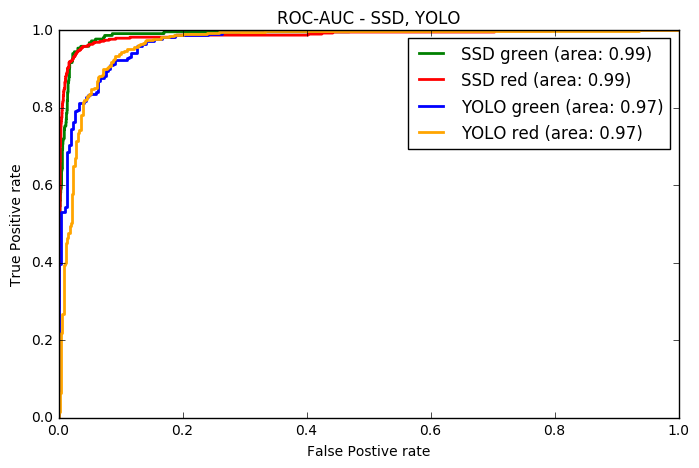

In [183]:
plt.plot(x_ssd_g, y_ssd_g, lw=2, color='green', label = 'SSD green (area: %0.2f)'% area_ssd_g)
plt.plot(x_ssd_r, y_ssd_r, lw=2, color='red', label = 'SSD red (area: %0.2f)' % area_ssd_r)
plt.plot(x_yolo_g, y_yolo_g, lw=2, color='blue', label = 'YOLO green (area: %0.2f)' % area_yolo_g)
plt.plot(x_yolo_r, y_yolo_r, lw=2, color='orange', label = 'YOLO red (area: %0.2f)' % area_yolo_r)
plt.xlabel("False Postive rate")
plt.ylabel("True Positive rate")
plt.title("ROC-AUC - SSD, YOLO")
plt.legend()

#### Analysis between model trained with data augmentation and model trained without data augementation

In [4]:
# Loading the files for the model SSD 300x300 trained with data augmentation for class red
cachedir_aug ='/home/saikiran/HBRS/RD/actual_data/ssd_cred_dir_300_aug/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_300x300_score_with_augmentation/Main/comp4_det_test_red.txt'

rec_r_aug, prec_r_aug, ap_r_aug,tp_array_ssdr_aug, fp_array_ssdr_aug = voc_eval(detpath, annopath, imagesetfile, classname, cachedir_aug, ovthresh=0.5, use_07_metric=False)

Reading annotation for 1/294
Reading annotation for 101/294
Reading annotation for 201/294
Saving cached annotations to /home/saikiran/HBRS/RD/actual_data/ssd_cred_dir_300_aug/annots.pkl


In [9]:
# Loading the files for the model SSD 300x300 trained with data augmentation for class green
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir_300_aug/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_300x300_score_with_augmentation/Main/comp4_det_test_green.txt'

rec_g_aug, prec_g_aug, ap_g_aug,tp_array_ssdg_aug, fp_array_ssdg_aug = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

Reading annotation for 1/294
Reading annotation for 101/294
Reading annotation for 201/294
Saving cached annotations to /home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir_300_aug/annots.pkl


In [10]:
print ap_r_aug, ap_g_aug, (ap_r_aug + ap_g_aug)/2

0.846247534342 0.829019188667 0.837633361505


In [11]:
# Loading the files for the model SSD 300x300 trained without data augmentation for class red
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cred_dir_300_noaug/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_300x300_score/Main/comp4_det_test_red.txt'

rec_r_noaug, prec_r_noaug, ap_r_noaug,tp_array_ssdr_noaug, fp_array_ssdr_noaug = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

Reading annotation for 1/294
Reading annotation for 101/294
Reading annotation for 201/294
Saving cached annotations to /home/saikiran/HBRS/RD/actual_data/ssd_cred_dir_300_noaug/annots.pkl


In [12]:
# Loading the files for the model SSD 300x300 trained without data augmentation for class green
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir_300_noaug/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_300x300_score/Main/comp4_det_test_green.txt'

rec_g_noaug, prec_g_noaug, ap_g_noaug,tp_array_ssdg_noaug, fp_array_ssdg_noaug = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

Reading annotation for 1/294
Reading annotation for 101/294
Reading annotation for 201/294
Saving cached annotations to /home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir_300_noaug/annots.pkl


In [13]:
print ap_r_noaug, ap_g_noaug, (ap_r_noaug + ap_g_noaug)/2

0.845327481992 0.831307450598 0.838317466295


In [49]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

In [199]:
map_values_ssd

[0.83763336150451451, 0.88038571378729347, 0.88153830941213007]

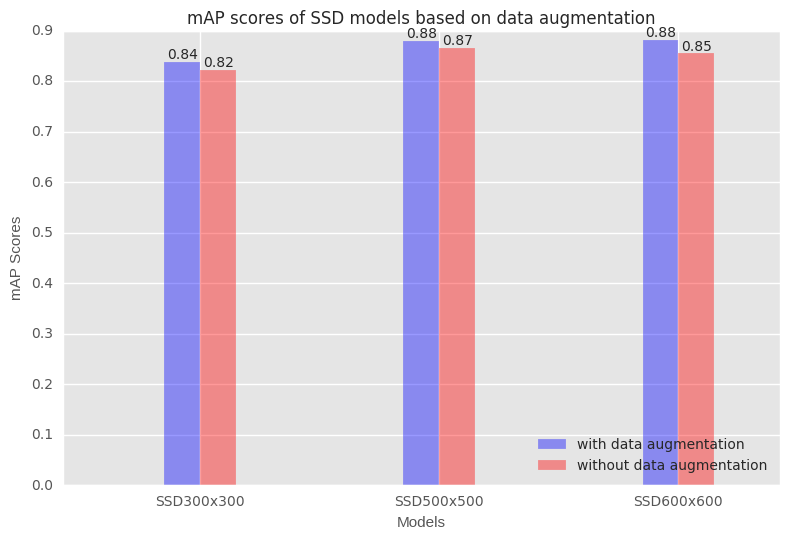

In [210]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('seaborn-notebook') 

fig, ax = plt.subplots()

index = np.arange(3)
bar_width = 0.15

ssd_with_aug = map_values_ssd #These values are calculated in the later cells
ssd_no_aug = [0.823, 0.866, 0.855]

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, ssd_with_aug, bar_width,
                 alpha=opacity,align='center',
                 color='b',
                 label='with data augmentation')

rects2 = plt.bar(index + bar_width, ssd_no_aug, bar_width,
                 alpha=opacity,align='center',
                 color='r',
                 label='without data augmentation')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%.2f' % (height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.xlabel('Models')
plt.ylabel('mAP Scores')
plt.title('mAP scores of SSD models based on data augmentation')
plt.xticks(index + bar_width / 2, ('SSD300x300', 'SSD500x500', 'SSD600x600'))
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('SSD_with_without_augmentation.png', bbox_inches='tight')
plt.show()


### Scores of all the SSD models which are 300x300, 500x500, 600x600 (all these models were trained with data augmentation)

In [100]:
map_values_ssd = []

#Loading the detections of 300x300

# Loading the files for the model SSD 300x300 trained with data augmentation for class red
cachedir_aug ='/home/saikiran/HBRS/RD/actual_data/ssd_cred_dir_300_aug/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_300x300_score_with_augmentation/Main/comp4_det_test_red.txt'

rec_r_aug, prec_r_aug, ap_r_aug,tp_array_ssdr_aug, fp_array_ssdr_aug = voc_eval(detpath, annopath, imagesetfile, classname, cachedir_aug, ovthresh=0.5, use_07_metric=False)


# Loading the files for the model SSD 300x300 trained with data augmentation for class green
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir_300_aug/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_300x300_score_with_augmentation/Main/comp4_det_test_green.txt'

rec_g_aug, prec_g_aug, ap_g_aug,tp_array_ssdg_aug, fp_array_ssdg_aug = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [101]:
def compute_avg(a1,a2):
    return (a1+a2)/2

In [103]:
map_values_ssd.append(compute_avg(ap_r_aug, ap_g_aug))

In [106]:
#Loading the detections of 500x500

# Loading the files for the model SSD 500x500 trained with data augmentation for class red
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cred_dir500'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_500x500_score/Main/comp4_det_test_red.txt'

rec_r_500, prec_r_500, ap_r_500,tp_array_ssdr_500, fp_array_ssdr_500 = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)


# Loading the files for the model SSD 500x500 trained with data augmentation for class green
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir500/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_500x500_score/Main/comp4_det_test_green.txt'

rec_g_500, prec_g_500, ap_g_500,tp_array_ssdg_500, fp_array_ssdg_500 = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

Reading annotation for 1/294
Reading annotation for 101/294
Reading annotation for 201/294
Saving cached annotations to /home/saikiran/HBRS/RD/actual_data/ssd_cred_dir500/annots.pkl
Reading annotation for 1/294
Reading annotation for 101/294
Reading annotation for 201/294
Saving cached annotations to /home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir500/annots.pkl


In [107]:
map_values_ssd.append(compute_avg(ap_r_500, ap_g_500))

In [108]:
map_values_ssd

[0.83763336150451451, 0.88038571378729347]

In [109]:
#Loading the detections of 600x600

# Loading the files for the model SSD 600x600 trained with data augmentation for class red
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cred_dir600'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_600x600_score/Main/comp4_det_test_red.txt'

rec_r_600, prec_r_600, ap_r_600,tp_array_ssdr_600, fp_array_ssdr_600 = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)


# Loading the files for the model SSD 600x600 trained with data augmentation for class green
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir600/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_600x600_score/Main/comp4_det_test_green.txt'

rec_g_600, prec_g_600, ap_g_600,tp_array_ssdg_600, fp_array_ssdg_600 = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

Reading annotation for 1/294
Reading annotation for 101/294
Reading annotation for 201/294
Saving cached annotations to /home/saikiran/HBRS/RD/actual_data/ssd_cred_dir600/annots.pkl
Reading annotation for 1/294
Reading annotation for 101/294
Reading annotation for 201/294
Saving cached annotations to /home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir600/annots.pkl


In [110]:
map_values_ssd.append(compute_avg(ap_r_600, ap_g_600))

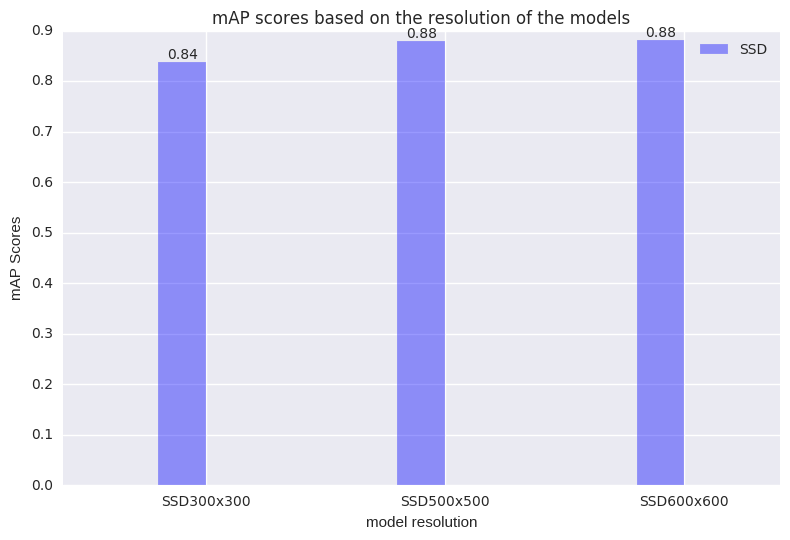

In [163]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('seaborn-notebook') 


index = np.arange(len(map_values_ssd))
bar_width = 0.2

opacity = 0.4

#fig, ax = plt.figure()

rects = plt.bar(index, map_values_ssd, bar_width,
                 alpha=opacity, align='center',
                 color='b',
                 label='SSD')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%.2f' % (height),
                ha='center', va='bottom')

autolabel(rects)

plt.xlabel('model resolution')
plt.ylabel('mAP Scores')
plt.title('mAP scores based on the resolution of the models')
plt.xticks(index + bar_width / 2, ('SSD300x300', 'SSD500x500', 'SSD600x600'))
plt.legend()

plt.tight_layout()
plt.savefig('SSD_sizesvsmap.png', bbox_inches='tight')
plt.show()

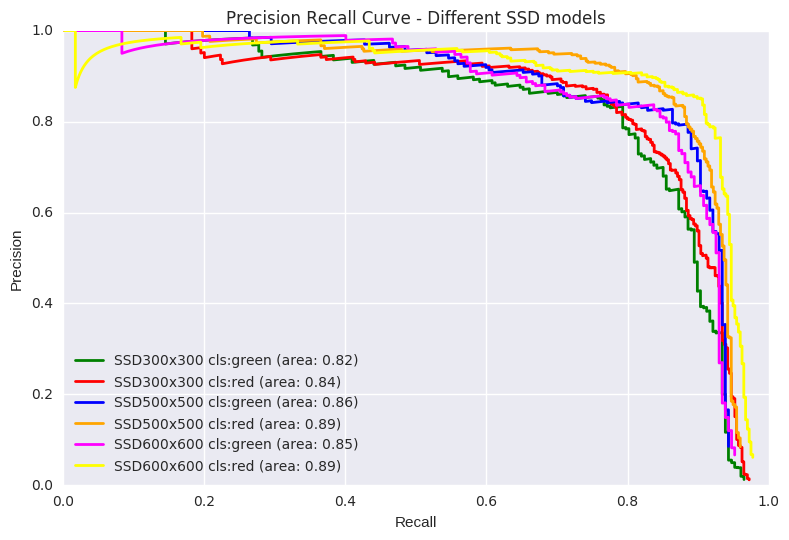

In [198]:
# ##ROC curves
# #loading true postive and false postive values of model SSD 300x300 
# x_ssd_g_300 = fp_array_ssdg_aug/np.max(fp_array_ssdg_aug)
# y_ssd_g_300 = tp_array_ssdg_aug/np.max(tp_array_ssdg_aug)
# x_ssd_r_300 = fp_array_ssdr_aug/np.max(fp_array_ssdr_aug)
# y_ssd_r_300 = tp_array_ssdr_aug/np.max(tp_array_ssdr_aug)

# #loading true positive and false postive values of model SSD 500x500
# x_ssd_g_500 = fp_array_ssdg_500/np.max(fp_array_ssdg_500)
# y_ssd_g_500 = tp_array_ssdg_500/np.max(tp_array_ssdg_500)
# x_ssd_r_500 = fp_array_ssdr_500/np.max(fp_array_ssdr_500)
# y_ssd_r_500 = tp_array_ssdr_500/np.max(tp_array_ssdr_500)

# #loaing true postive and false positive values of model SSD 600x600
# x_ssd_g_600 = fp_array_ssdg_600/np.max(fp_array_ssdg_600)
# y_ssd_g_600 = tp_array_ssdg_600/np.max(tp_array_ssdg_600)
# x_ssd_r_600 = fp_array_ssdr_600/np.max(fp_array_ssdr_600)
# y_ssd_r_600 = tp_array_ssdr_600/np.max(tp_array_ssdr_600)


#Code to calculate the area of the curves for different SSD models
from sklearn.metrics import auc

area_ssd_g_300 = auc(rec_g_aug, prec_g_aug)
area_ssd_r_300 = auc(rec_r_aug, prec_r_aug)

area_ssd_g_500 = auc(rec_g_500, prec_g_500)
area_ssd_r_500 = auc(rec_r_500, prec_r_500)

area_ssd_g_600 = auc(rec_g_600, prec_g_600)
area_ssd_r_600 = auc(rec_r_600, prec_r_600)

#Code to plot the precision recall curves 

plt.plot(rec_g_aug, prec_g_aug, lw=2, color='green', label = 'SSD300x300 cls:green (area: %0.2f)'% area_ssd_g_300)
plt.plot(rec_r_aug, prec_r_aug, lw=2, color='red', label = 'SSD300x300 cls:red (area: %0.2f)' % area_ssd_r_300)
plt.plot(rec_g_500, prec_g_500, lw=2, color='blue', label = 'SSD500x500 cls:green (area: %0.2f)' % area_ssd_g_500)
plt.plot(rec_r_500, prec_r_500, lw=2, color='orange', label = 'SSD500x500 cls:red (area: %0.2f)' % area_ssd_r_500)
plt.plot(rec_g_600, prec_g_600, lw=2, color='magenta', label = 'SSD600x600 cls:green (area: %0.2f)' % area_ssd_g_600)
plt.plot(rec_r_600, prec_r_600, lw=2, color='yellow', label = 'SSD600x600 cls:red (area: %0.2f)' % area_ssd_r_600)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve - Different SSD models")
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('prec_rec_all_ssd.png', bbox_inches='tight')